# Computer Vision

---
![](.\Assets\Images\computer-vision.jpg)

### Current Applications
#### Classification
![](.\Assets\Images\Classify.png)

The aim is the classify images into different categories based on the prominent object in the image (For example bird and cat classification)

#### Style Transfer
![](.\Assets\Images\Style.jpg)

The goal is to combine two images so as to create an artistic pictures. (Retrica is one such example)

#### Portait Mode
![](.\Assets\Images\Portrait.jpg)

The goal is to segment the image into background and foreground and then blur the background.

---

### Near Future Apps
#### Autonomous Cars
![](.\Assets\Images\Auto.jpg)

We want to build cars that are capable of driving without any human intervention.

#### Medical Imaging
![](.\Assets\Images\mri.jpg)

Build robust systems that are capable of understanding various medical images and detect diseases in the subject.

---

### Out of Sci-Fi
#### 3D Scene Representation
![](https://techcrunch.com/wp-content/uploads/2018/06/gif_2.gif)

Unlike humans current AI's aren't capable enough to percieve what a scene would like from a different angle

#### 3D reconstruction
![](https://beta.techcrunch.com/wp-content/uploads/2017/08/image_1.png)

Humans are capable of understanding a 2D diagram and render it into a 3D visualization

#### Bionic Eyes
![](.\Assets\Images\bionic.jpg)

The apex goal is to create a camera(eye) that can perceive the world the way humans do.

In [1]:
from IPython.display import HTML

# Youtube
HTML('<iframe width="780" height="560" src="https://www.youtube.com/embed/B8R148hFxPw" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')
# HTML('<iframe width="560" height="315" src="https://www.youtube.com/watch?v=fmVWLr0X1Sk" frameborder="0" allowfullscreen></iframe>')

# Computer Vision
---
Computer vision is concerned with the automatic extraction, analysis and understanding of useful information from a single image or a sequence of images. It involves the development of a theoretical and algorithmic basis to achieve automatic visual understanding.

# Technology Stack
---
![](.\Assets\Images\stack.png)

# Canny Edge Detection

---
A traditional Computer vision approach that utilizes linear algebra to detect edges in an image

### Steps
![](.\Assets\Images\CannyEdge.png)

### Demo of Edge Detection

In [2]:
import detector as d

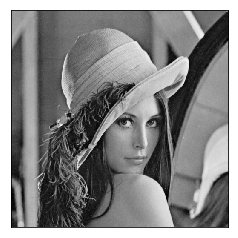

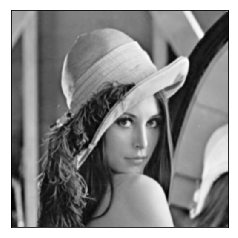

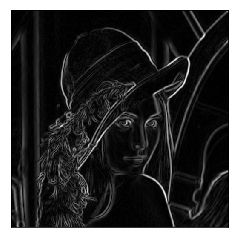

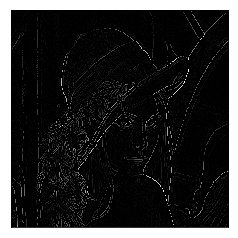

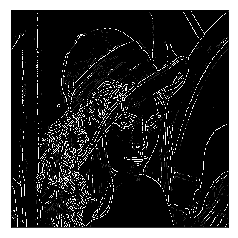

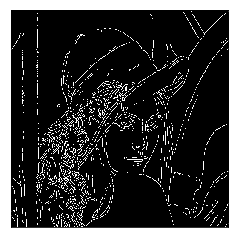

In [3]:
img_list = d.ced('.\Lenna.png', 1.4, 25, 45, True)
d.plot(img_list)

# Deep Learning For Computer Vision

### Artificial Neural Network
Artificial neurons are mathematical function imagined as a model of biological neurons—the human grey matter. They are made up of two basic mathematical operations – a summing operation which sums all the inputs and a non-linear transformer called the activation function.
![](.\Assets\Images\Ann.png)

### Convolutional Neural Network

**What is Convolution?**

Convolution is a mathematical operation performed on matrix using a *kernel*. A convolution operation sums the elements of a matrix in a local neighborhood, weighted by a matrix of numerical values called kernel
![](.\Assets\Images\convolution.png)

These Kernels can be used to extract features as we saw in the Canny Edge Detection, where a Sobel filter was used to extract the gradient. A Convolutional Neural Network tries to learn the Kernel weights and hence build a strong feature extractor.

## End to End Computer Vision Using Deep Learning
---
![](.\Assets\Images\convFlow.png)

In [13]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as k
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#load mnist dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data() #everytime loading data won't be so easy :)

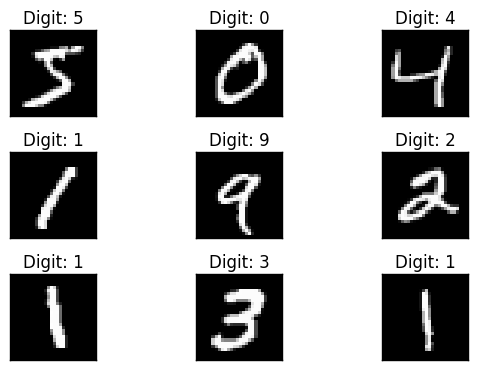

In [5]:
#visualising first 9 data from training dataset
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])
fig

In [7]:
# let's print the actual data shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [8]:
#input image size 28*28
img_rows , img_cols = 28, 28

In [9]:
#reshaping
#this assumes our data format
#For 3D data, "channels_last" assumes (conv_dim1, conv_dim2, conv_dim3, channels) while 
#"channels_first" assumes (channels, conv_dim1, conv_dim2, conv_dim3).
if k.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
#more reshaping
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [16]:
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949], dtype=int64))


In [17]:
#set number of categories
num_category = 10

In [19]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_category)
y_test = keras.utils.to_categorical(y_test, num_category)
y_train[0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

In [20]:
##model building
model = Sequential()
#convolutional layer with rectified linear unit activation
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
#32 convolution filters used each of size 3x3
#again
model.add(Conv2D(64, (3, 3), activation='relu'))
#64 convolution filters used each of size 3x3
#choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
#randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))
#flatten since too many dimensions, we only want a classification output
model.add(Flatten())
#fully connected to get all relevant data
model.add(Dense(128, activation='relu'))
#one more dropout for convergence' sake :) 
model.add(Dropout(0.5))
#output a softmax to squash the matrix into output probabilities
model.add(Dense(num_category, activation='softmax'))
#Adaptive learning rate (adaDelta) is a popular form of gradient descent rivaled only by adam and adagrad
#categorical ce since we have multiple classes (10) 
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [22]:
batch_size = 128
num_epoch = 10
#model training
model_log = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 284s 5ms/step - loss: 0.2120 - acc: 0.9354 - val_loss: 0.0610 - val_acc: 0.9801
Epoch 2/10
60000/60000 [==============================] - 271s 5ms/step - loss: 0.0894 - acc: 0.9737 - val_loss: 0.0422 - val_acc: 0.9861
Epoch 3/10
60000/60000 [==============================] - 270s 4ms/step - loss: 0.0677 - acc: 0.9800 - val_loss: 0.0402 - val_acc: 0.9870
Epoch 4/10
60000/60000 [==============================] - 276s 5ms/step - loss: 0.0567 - acc: 0.9834 - val_loss: 0.0332 - val_acc: 0.9891
Epoch 5/10
60000/60000 [==============================] - 271s 5ms/step - loss: 0.0472 - acc: 0.9860 - val_loss: 0.0322 - val_acc: 0.9887
Epoch 6/10
60000/60000 [==============================] - 274s 5ms/step - loss: 0.0417 - acc: 0.9870 - val_loss: 0.0297 - val_acc: 0.9899
Epoch 7/10
60000/60000 [==============================] - 264s 4ms/step - loss: 0.0371 - acc: 0.9887 - val_loss: 0.0312 - 

In [23]:
#how well did it do? 
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0296396646054
Test accuracy: 0.9904


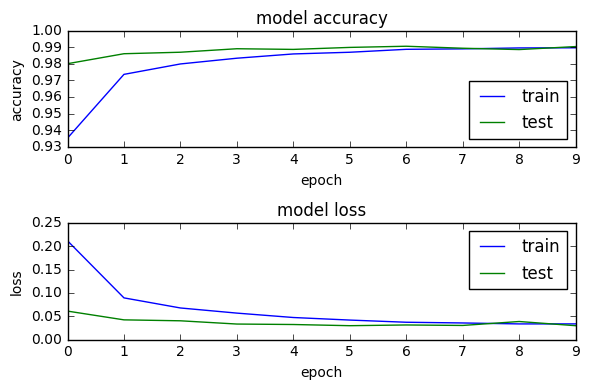

In [24]:
import os
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['acc'])
plt.plot(model_log.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

In [25]:
#Save the model
# serialize model to JSON
model_digit_json = model.to_json()
with open("model_digit.json", "w") as json_file:
    json_file.write(model_digit_json)
# serialize weights to HDF5
model.save_weights("model_digit.h5")
print("Saved model to disk")

Saved model to disk


## Super Res Zoom

### How Cameras Work?

In typical consumer cameras, the camera sensor elements are meant to measure only the intensity of the light, not directly its color. To capture real colors present in the scene, cameras use a color filter array placed in front of the sensor so that each pixel measures only a single color (red, green, or blue).

**Bayer Filter**

![](.\Assets\Images\bayer.png)


A camera processing pipeline then has to reconstruct the real colors and all the details at all pixels, given this partial information.* Demosaicing starts by making a best guess at the missing color information, typically by interpolating from the colors in nearby pixels, meaning that two-thirds of an RGB digital picture is actually a reconstruction!

**Demosaicing**

![](.\Assets\Images\demosiac.png)

### How Super-Resolution Work?

In multi-frame super-resolution, the general idea is to align and merge low-resolution bursts directly onto a grid of the desired (higher) resolution. 

**Super-Resolution**

![](.\Assets\Images\superRes.png)

Google used the hand tremor to capture multiple photos and used AI to stich them together. When Hand Tremor's absent it used Opticial Image Stabilizer to pertube the image by a few pixels.

**Practical Challenges of Super Resolution**

1. A single image from a burst is noisy, even in good lighting

![](https://2.bp.blogspot.com/-NyjtuhLBt48/W8PB7h1cUeI/AAAAAAAADYk/IsXUiGbmBZw-Um7OSf8PHSDL1xcL_WlIwCLcBGAs/s640/image11.png)

2. Motion between images in a burst is not limited to just the movement of the camera. There can be complex motions in the scene such as wind-blown leaves, ripples moving across the surface of water 

3. Because much of motion is random, even if there is good alignment, the data may be dense in some areas of the image and sparse in others 
![](.\Assets\Images\sparse_1.png)


**Google's Solution**
* To effectively merge frames in a burst, and to produce a red, green, and blue value for every pixel without the need for demosaicing, developed a method of integrating information across the frames that takes into account the edges of the image, and adapts accordingly.

*  We select one frame as a “reference image”, and merge information from other frames into it only if we’re sure that we have found the correct corresponding feature. In this way, we can avoid artifacts like “ghosting” or motion blur, and wrongly merged parts of the image.

![](.\Assets\Images\motionblur.png)

All images are owned by their respective creators. We'll be pleased to cite you for the same